# Historia i pochodzenie
Idea fraktala drzewa binarnego wywodzi się z badań nad geometrią roślin, szczególnie z prób matematycznego modelowania naturalnych rozgałęzień drzew, krzewów i systemów naczyń. Zauważono, że ich struktury są samopodobne - każda kolejna gałąź wygląda jak pomniejszona kopia całości, co jest charakterystyczne dla fraktali.
Drzewo binarne stało się też jednym z pierwszych przykładów używanych do nauczania rekurencji w informatyce, ponieważ można je zdefiniować w sposób naturalnie samoodnoszący się: drzewo składa się z węzła oraz dwóch poddrzew, które same są drzewami binarnymi. Ta struktura idealnie nadaje się również do budowy drzew decyzyjnych, gdzie każdy podział odpowiada konkretnemu wyborowi „tak/nie”.


## Znaczenie w matematyce i zastosowania
- Modelowanie przyrody: idealizowany model rozgałęzień drzew, płuc, sieci krwionośnych.
- Informatyka: struktury danych i algorytmy oparte na drzewach binarnych, np. drzewa decyzyjne, kompresja, wyszukiwanie.


### Miara Hausdorfa klasycznego fraktala drzewa binarnego:

$$
D = \frac{\ln 2}{\ln \left( \frac{1}{r} \right)}
$$
 gdzie r to ratio pomiędzy rozmiarem dziecka i rodzica.
Wynika ona z tego, że w każdej iteracji dostajemy 2 kopie rodzica przeskalowane o r względem rodzica


## Konstrukcja
Drzewo binarne tworzy się rekurencyjnie w następujący sposób:
1. Zaczynamy od pnia - odcinka w pionie (poziom 0).
2. Z jego końca wyrastają dwa identyczne odcinki (gałęzie) pod ustalonym kątem $\alpha$ w lewo i prawo.
3. Każda nowa gałąź jest krótsza od poprzedniej, zwykle o stały współczynnik.
4. Dla każdej gałęzi powtarzamy krok 2 - do ustalonej głębokości.

# Implementacja
Poniżej zaimplementowano algorytm pozwalający na stworzenie i wizualizację frakatala klasycznego drzewa binarnego w zależności od podanych parametrów.

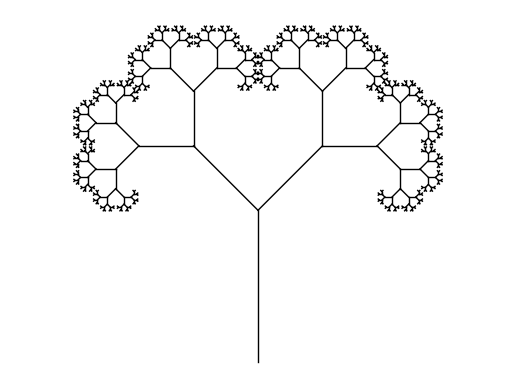

In [28]:
import matplotlib.pyplot as plt
import math


def draw_tree(ax, x, y, angle, length, level):
# x - współrzędna x-owa początkowego punktu 
# y - współrzędna y-owa początkowego punkty.
# angle - kąt, pod którym rysowana jest aktualna gałąź drzewa względem osi poziomej
# length - długość dziecka względem rodzica.
# level - ilość iteracji

    if level == 0:
        return
    else:
        x_new = x + length * math.cos(math.radians(angle))
        y_new = y + length * math.sin(math.radians(angle))
        ax.plot([x, x_new], [y, y_new], 'k-', lw=1)
        
        draw_tree(ax, x_new, y_new, angle - 45, length * 0.6, level-1)
        draw_tree(ax, x_new, y_new, angle + 45, length * 0.6, level-1)

fig, ax = plt.subplots()
ax.axis('equal')
ax.axis('off')
draw_tree(ax, 0, 0, 90, 5, 10)

plt.show()

# Modyfikacje klasycznego drzewa binarnego
 
Poniżej przedstawiono wizualizacje różnych modyfikacji fraktala drzewa binarnego wraz z przykładową implementacją. Wprowadzone modyfikacje obejmują:
1. **Klasyczne drzewo binarne z kątem większym niż $90^\circ$** - eksperymentowanie z kątem pomiędzy gałęziami.
2. **Asymetryczne drzewo smocze** - nierównomierne rozgałęzienia poprzez modyfikację długości i kąta.
3. **H-drzewo** - kształt uzyskany poprzez odpowiednie dobranie proporcji i kąta.
4. **Fraktal drzewa binarnego z kolorowaniem gałęzi** - kolor gałęzi zmienia się w zależności od długości segmentu.
5. **Drzewo Pitagorasa** - wariant fraktala, w którym gałęzie zastąpiono kwadratami.

### Klasyczne drzewo binarne z kątem większym niż $90^\circ$

**Cel modyfikacji:** eksperymentowanie z kątem rozgałęzień, aby zobaczyć wpływ na jego wygląd.

**Zmiana w algorytmie:** kąt odpowiedzialny za szerokość rozgałęzienia ustawiono powyżej 90 stopni.

**Efekt wizualny:** mimo małej zmiany w algorytmie, fraktal zmienił swój wygląd i nie przypomina drzewa binarnego, ale struktura fraktalna została zachowana.

**Obserwacja:** zbyt duże kąty skutkują dużymi zmianami wizualnymi.

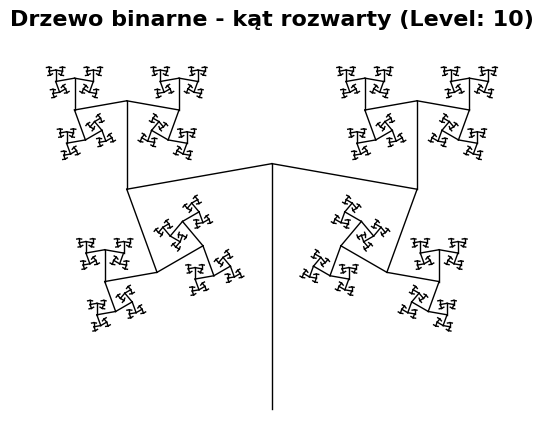

In [35]:
import matplotlib.pyplot as plt
import math


def draw_tree(ax, x, y, angle, length, level):
# x - współrzędna x-owa początkowego punktu 
# y - współrzędna y-owa początkowego punkty.
# angle - kąt, pod którym rysowana jest aktualna gałąź drzewa względem osi poziomej
# length - długość dziecka względem rodzica.
# level - ilość iteracji

    if level == 0:
        return
    else:
        x_new = x + length * math.cos(math.radians(angle))
        y_new = y + length * math.sin(math.radians(angle))
        ax.plot([x, x_new], [y, y_new], 'k-', lw=1)
        
        draw_tree(ax, x_new, y_new, angle - 100, length * 0.6, level-1)
        draw_tree(ax, x_new, y_new, angle + 100, length * 0.6, level-1)

fig, ax = plt.subplots()
ax.axis('equal')
ax.axis('off')
max_level = 10
draw_tree(ax, 0, 0, 90, 5, max_level)

plt.title(f'Drzewo binarne - kąt rozwarty (Level: {max_level})', fontsize=16, fontweight='bold', pad=20)
plt.show()

### Asymetryczne drzewo smocze

**Cel modyfikacji:** wprowadzenie nierównomiernych rozgałęzień oraz zmiany grubości gałęzi w zależności od poziomu rekursji, aby drzewo wyglądało bardziej naturalnie.

**Zmiana w algorytmie:**
- Różne długości lewej i prawej gałęzi.
- Różne kąty dla lewej i prawej gałęzi.
- Grubość linii zależna od poziomu rekursji - grubsze gałęzie na dole, cieńsze na końcach.

**Efekt wizualny:** drzewo nie jest symetryczne, gałęzie mają nieregularne długości i zmienną grubość, co przypomina naturalne drzewo.

**Obserwacja:** asymetria wraz ze stopniowym zmniejszaniem grubości gałęzi prawia, że drzewo wygląda bardziej realistycznie.

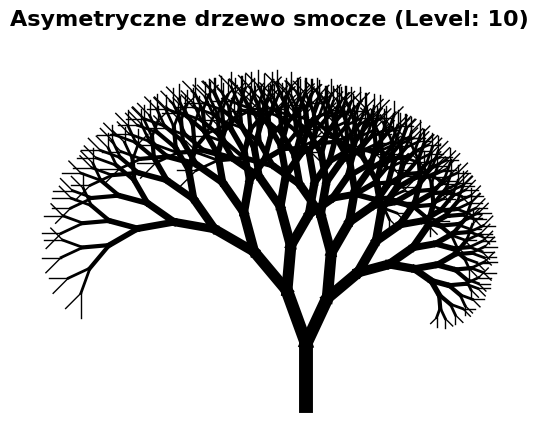

In [34]:

def draw_tree(ax, x, y, angle, length, level, max_length):
# x - współrzędna x-owa początkowego punktu 
# y - współrzędna y-owa początkowego punkty.
# angle - kąt, pod którym rysowana jest aktualna gałąź drzewa względem osi poziomej
# length - długość dziecka względem rodzica.
# level - ilość iteracji

    if level == 0:
        return
    else:
        x_new = x + length * math.cos(math.radians(angle))
        y_new = y + length * math.sin(math.radians(angle))

        ax.plot([x, x_new], [y, y_new], 'k-', lw=level)
        
        draw_tree(ax, x_new, y_new, angle - 25, length * 0.8, level-1, max_length)
        draw_tree(ax, x_new, y_new, angle + 20, length * 0.9, level-1, max_length)

fig, ax = plt.subplots()
ax.axis('equal')
ax.axis('off')
max_level = 10
draw_tree(ax, 0, 0, 90, 5, max_level, 5)

plt.title(f'Asymetryczne drzewo smocze (Level: {max_level})', fontsize=16, fontweight='bold', pad=20)
plt.show()

### H-drzewo

**Cel modyfikacji:** uzyskanie fraktala o kształcie litery „H”.

**Zmiana w algorytmie:** kąt rozgałęzień ustawiono na 90 stopni, długości gałęzi dobrano tak, aby tworzyły kwadratowe rozgałęzienia.

**Efekt wizualny:** powstaje charakterystyczny, symetryczny wzór „H” z czterema końcami, które generują kolejne H.

**Obserwacja:** zmiana kąta i proporcji całkowicie zmienia charakter drzewa.

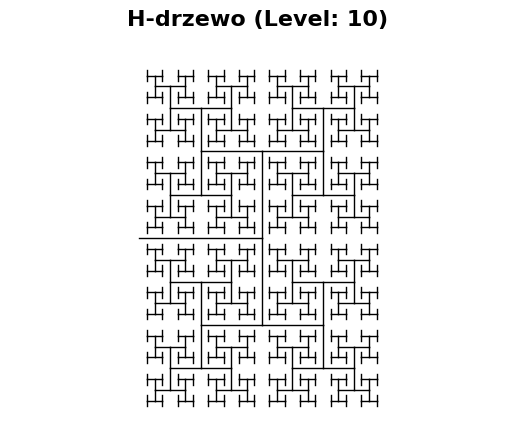

In [32]:
import matplotlib.pyplot as plt
import math


def draw_tree(ax, x, y, angle, length, level):
# x - współrzędna x-owa początkowego punktu 
# y - współrzędna y-owa początkowego punkty.
# angle - kąt, pod którym rysowana jest aktualna gałąź drzewa względem osi poziomej
# length - długość dziecka względem rodzica.
# level - ilość iteracji

    if level == 0:
        return
    else:
        x_new = x + length * math.cos(math.radians(angle))
        y_new = y + length * math.sin(math.radians(angle))
        ax.plot([x, x_new], [y, y_new], 'k-', lw=1)
        
        draw_tree(ax, x_new, y_new, angle - 90, length / math.sqrt(2), level-1)
        draw_tree(ax, x_new, y_new, angle + 90, length / math.sqrt(2), level-1)

fig, ax = plt.subplots()
ax.axis('equal')
ax.axis('off')
max_level = 10
draw_tree(ax, 0, 0, 0, 5, max_level)

plt.title(f'H-drzewo (Level: {max_level})', fontsize=16, fontweight='bold', pad=20)
plt.show()

### Fraktal drzewa binarnego z kolorowaniem gałęzi

**Cel modyfikacji:** poprawa estetyki fraktala.

**Zmiana w algorytmie:** kolor każdej gałęzi zależy od długości gałęzi (gradient od ciemnej do jasnej zieleni).

**Efekt wizualny:** łatwiej rozróżnić gałęzie i poziomy drzewa.

**Obserwacja:** kolorowanie pomaga obserwować hierarchię i strukturę fraktala.

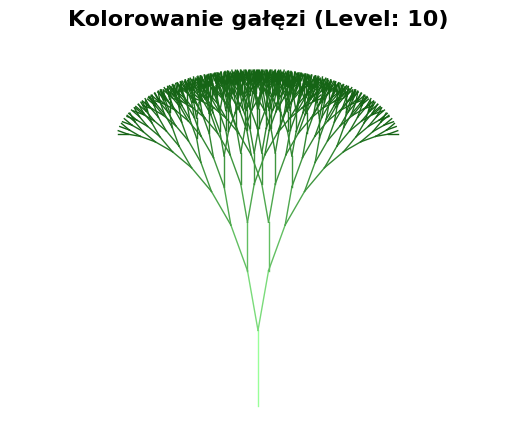

In [31]:
import matplotlib.pyplot as plt
import math


def draw_tree(ax, x, y, angle, length, level, max_length):
# x - współrzędna x-owa początkowego punktu 
# y - współrzędna y-owa początkowego punkty.
# angle - kąt, pod którym rysowana jest aktualna gałąź drzewa względem osi poziomej
# length - długość dziecka względem rodzica.
# level - ilość iteracji

    if level == 0:
        return
    else:
        x_new = x + length * math.cos(math.radians(angle))
        y_new = y + length * math.sin(math.radians(angle))
        
        t = length / max_length
        r = t*0.6 + (1-t)*0
        g = t*1 + (1-t)*0.3
        b = t*0.6 + (1-t)*0
        color = (r, g, b)


        ax.plot([x, x_new], [y, y_new], color=color, lw=1)

        
        draw_tree(ax, x_new, y_new, angle - 10, length * 0.8, level-1, max_length)
        draw_tree(ax, x_new, y_new, angle + 10, length * 0.8, level-1, max_length)

fig, ax = plt.subplots()
ax.axis('equal')
ax.axis('off')
max_level = 10
draw_tree(ax, 0, 0, 90, 5, max_level, 5)

plt.title(f'Kolorowanie gałęzi (Level: {max_level})', fontsize=16, fontweight='bold', pad=20)
plt.show()


### Drzewo Pitagorasa

**Cel modyfikacji:** stworzenie fraktala drzewa binarnego z kwadratami zamiast odcinków.

**Zmiana w algorytmie:** każdy segment drzewa zastąpiono kwadratem; nad jego górną krawędzią rysowane są dwa nowe kwadraty zgodnie z twierdzeniem Pitagorasa.

**Efekt wizualny:** powstaje charakterystyczny kwadratowy fraktal, znany jako Drzewo Pitagorasa.

**Obserwacja:** Fraktal wygląda bardziej geometrycznie, ale nadal można zauważyć charakterystyczną drzewiastą strukturę szczególnie dla dalszych etapów rekurencji.

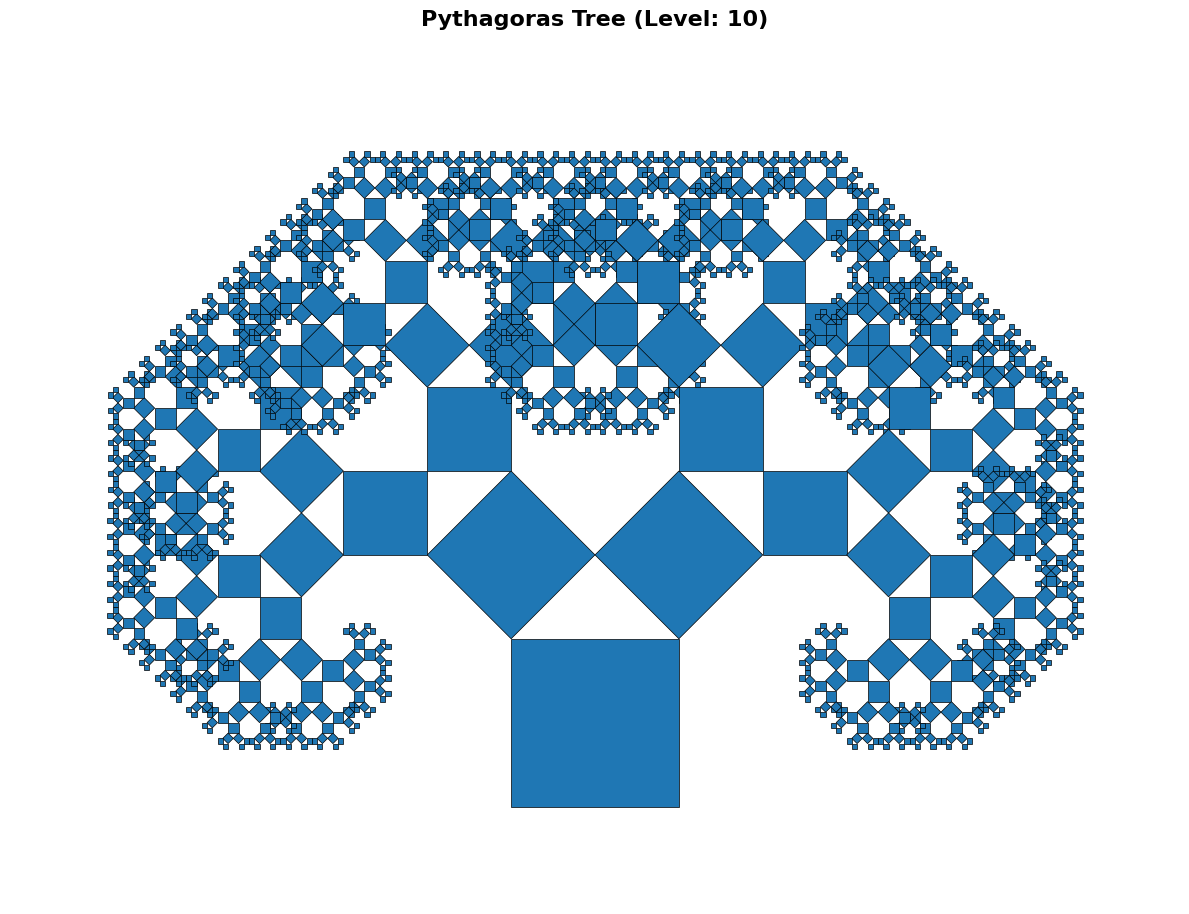

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

def draw_square(ax, bottom_left, side_length, angle, level, max_level, bounds):
    # bottom_left - współrzędne dolnego-lewego wierzchołka aktualnego kwadratu (x, y)
    # side_length - długość boku aktualnego kwadratu
    # angle - kąt obrotu kwadratu względem osi X (w radianach)
    # depth - aktualny poziom rekursji
    # max_depth - maksymalny poziom rekursji
    # bounds - słownik do śledzenia minimalnych i maksymalnych wartości x i y (do dopasowania wykresu)

    if level > max_level:
        return
    
    # Wierzchołki kwadratu w lokalnym układzie współrzędnych
    x, y = bottom_left
    corners = np.array([
        [0, 0],                  # dolny-lewy
        [side_length, 0],        # dolny-prawy
        [side_length, side_length], # górny-prawy
        [0, side_length]         # górny-lewy
    ])
    
    # Tworzymy macierz rotacji kwadratu
    cos_a, sin_a = np.cos(angle), np.sin(angle)
    R = np.array([[cos_a, -sin_a], [sin_a, cos_a]])
    
    # Obracamy i przesuwamy wierzchołki do układu globalnego
    rotated = corners @ R.T + np.array([x, y])
    
    # Aktualizujemy granice drzewa, żeby dopasować wykres
    bounds['min_x'] = min(bounds['min_x'], rotated[:, 0].min())
    bounds['max_x'] = max(bounds['max_x'], rotated[:, 0].max())
    bounds['min_y'] = min(bounds['min_y'], rotated[:, 1].min())
    bounds['max_y'] = max(bounds['max_y'], rotated[:, 1].max())
    
    # Rysujemy kwadrat (czarna krawędź, bez wypełnienia)
    square = patches.Polygon(rotated, edgecolor='black', linewidth=0.5)
    ax.add_patch(square)
    
    # Górne wierzchołki kwadratu (potrzebne do wyznaczenia dzieci)
    top_left = rotated[3]
    top_right = rotated[2]
    
    # Obliczamy wierzchołek trójkąta prostokątnego na górnej krawędzi
    mid_top = (top_left + top_right) / 2
    perp = np.array([-(top_right[1]-top_left[1]), top_right[0]-top_left[0]])
    perp = perp / np.linalg.norm(perp)
    apex = mid_top + perp * (side_length / 2)
    
    # Nowa długość boku dla dzieci (kwadraty po 45 stopniach)
    new_side = side_length / np.sqrt(2)
    
    # LEWY kwadrat: dolny-lewy wierzchołek = top_left, kąt = w kierunku apex
    left_edge = apex - top_left
    left_angle = np.arctan2(left_edge[1], left_edge[0])
    draw_square(ax, top_left, new_side, left_angle, level + 1, max_level, bounds)
    
    # PRAWY kwadrat: dolny-lewy wierzchołek = apex, kąt = w kierunku top_right
    right_edge = top_right - apex
    right_angle = np.arctan2(right_edge[1], right_edge[0])
    draw_square(ax, apex, new_side, right_angle, level + 1, max_level, bounds)

def create_pythagoras_tree(max_level=10, initial_size=1):
    # Tworzymy wykres
    fig, ax = plt.subplots(1, 1, figsize=(12, 12))
    ax.set_aspect('equal')
    ax.axis('off')
    
    # Początkowy kwadrat na dole, wyśrodkowany
    start_x = -initial_size / 2
    start_y = 0
    
    # Słownik do śledzenia granic drzewa (min/max x i y)
    bounds = {
        'min_x': float('inf'),
        'max_x': float('-inf'),
        'min_y': float('inf'),
        'max_y': float('-inf')
    }
    
    # Rysujemy drzewo Pythagorasa
    draw_square(ax, (start_x, start_y), initial_size, 0, 0, max_level, bounds)
    
    # Obliczamy margines, żeby drzewo mieściło się na wykresie
    width = bounds['max_x'] - bounds['min_x']
    height = bounds['max_y'] - bounds['min_y']
    margin = max(width, height) * 0.1
    
    # Ustawiamy granice wykresu z marginesem
    ax.set_xlim(bounds['min_x'] - margin, bounds['max_x'] + margin)
    ax.set_ylim(bounds['min_y'] - margin, bounds['max_y'] + margin)
    
    plt.title(f'Drzewo Pitagorasa (Level: {max_level})', fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()

create_pythagoras_tree(max_level=10, initial_size=1)


# Wnioski
Drzewa binarne to rozległa klasa fraktali. Część z nich w żadnym stopniu nie przypomina klasycznego drzewa binarnego, szczególnie gdy kąt między dziećmi zbliża się do lub przekracza 180 stopi. Wpływ parametrów jest znaczący:
- Kąt rozgałęzień - większe kąty powodują szersze, bardziej rozgałęzione drzewo, natomiast mniejsze kąty tworzą wąskie, pionowe struktury.
- Asymetria - wprowadzenie różnych długości lewej i prawej gałęzi (drzewo smocze) daje ciekawe, nierównomierne kształty, które mogą przypominać naturalne gałęzie.
- H-drzewo - ustawienie kątów i proporcji na odpowiednie wartości pozwala uzyskać charakterystyczny, geometryczny kształt litery „H”, pokazując, że zmiana parametrów może całkowicie zmienić wygląd fraktala.
- Kolorowanie gałęzi - zmiana koloru w zależności od długości sprawia, że fraktal bardziej przypomina naturalne drzewo oraz pozwala lepiej obserwować strukturę oraz hierarchię gałęzi.
- Drzewo Pitagorasa - zastąpienie gałęzi kwadratami tworzy klasyczny fraktal geometryczny

Aby zaobserwować szczegóły fraktala, warto stosować stosunkowo wysokie ratio (pomiędzy 0,9 a 1), ponieważ w innym przypadku długości odcinków bardzo szybko maleją, a ekran komputera nie jest w stanie wyrenderować szczegółów. Mimo prostego algorytmu implementacji, czas wykonania programu rośnie bardzo szybko wraz z ilością poziomów rekursji. Przy 15 poziomach rekurencji czas oczekiwania jest znaczący, natomiast przy 10 poziomach fraktal powstaje niemal natychmiast.
